#Task- Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python-Download Data Set.


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Read the data

In [125]:
df=pd.read_csv("/content/50_Startups.csv")

In [150]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#DATA CLEANING

In [128]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [30]:
df.shape

(50, 5)

In [129]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [130]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [131]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [133]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#spiliting dataset into testing & training

In [134]:
import sklearn


In [135]:
from sklearn.model_selection import train_test_split

x=df[['R&D Spend', 'Administration', 'Marketing Spend']]
y=df['Profit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/2, random_state = 48)


#CREATE SIMPLE LINEAR MODEL

In [136]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
x = df.iloc[:,: -1].values
y = df.iloc[:,1].values

##predicting the test result

In [138]:
x_pred = model.predict(x_test)
y_pred

array([ 71866.19877278, 115042.89281066,  95791.34539841,  55059.32683262,
       134884.75980058,  98059.07149393,  95625.39561964,  98968.30597024,
        84629.5093767 , 112466.40345656, 112745.46209383, 114536.50755312,
        70853.36813819, 155366.78749809, 107605.29591756, 164829.05051675,
        67101.33222479, 111885.37274315,  97022.43883852, 150848.01468785,
        93737.01039077,  67106.49465904,  81303.0645064 ,  71115.92813404,
        96727.02719312])

In [139]:

y_test

8     152211.77
3     182901.99
45     64926.08
1     191792.06
47     42559.73
7     155752.60
9     149759.96
14    132602.65
20    118474.03
19    122776.86
11    144259.40
42     71498.49
23    108733.99
26    105733.54
12    141585.52
5     156991.12
40     78239.91
33     96778.92
38     81229.06
48     35673.41
35     96479.51
13    134307.35
24    108552.04
37     89949.14
36     90708.19
Name: Profit, dtype: float64

In [140]:
model.intercept_

43829.225018791214

In [141]:
model.coef_

array([ 0.85896924, -0.0057742 ,  0.01770947])

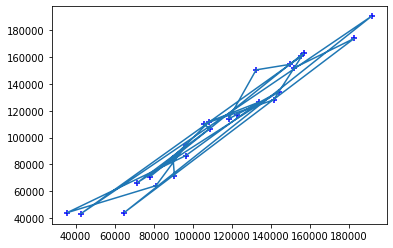

In [146]:
plt.scatter(y_test,x_pred,color='b',marker='+')
plt.plot(y_test,x_pred)
plt.show()

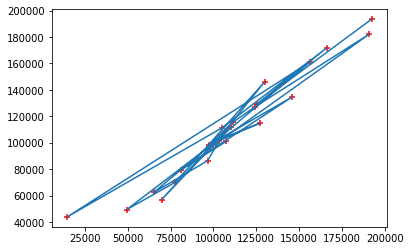

In [147]:
x_pred_train = model.predict(x_train)
plt.scatter(y_train,x_pred_train,color='r',marker='+')
plt.plot(y_train,x_pred_train)
plt.show()

In [148]:
from sklearn.metrics import r2_score


In [149]:
r2_score(y_test,x_pred)

0.9414339271548026